homework 9
---
due: June 1 2022

authors: pegler, prüwasser, scheftner

## Part 1 

- use the code from tutorial 11 to fit a gaussian mixture model to the same data with the number of clusters/components changing from 2 to 8. (all values from 2 to 8 with for loop).
- for each iteration, calculate the model fit measures BIC and AIC
- graph on a single graph, the number of iterations on the X-axis, and both AIC and BIC on the Y axis (with a line for AIC and another for BIC), 
- remember to add axis labels and legends (to see which one is AIC, which is BIC), try to make it look nice, by chaning fontsize, color, linewidth etc. 
- remember AIC and BIC are model fit measures, basedon the log-likelihood, and lower values indicate better model fit

In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

N = 200
n_comps = 3

# create covariance matrix and adapt it a bit
M_cov = np.eye(2)
M_cov[0, 1] = 1
M_cov[1, 0] = 1
M_cov[1, 1] = 1
M_cov[0, 0] = 3

# create 3 arrays with different means and stack them
A_1 = np.random.multivariate_normal([-4, 0], M_cov, N)
A_2 = np.random.multivariate_normal([5, 2], M_cov, N)
A_3 = np.random.multivariate_normal([1, 6], M_cov, N)
X = np.vstack((A_1, A_2, A_3))

# create model and fit the data
gm = GaussianMixture(n_components = n_comps)
gm.fit(X)

print(f"n Clusters: {n_comps: ,.0g}")
print(f"Score:      {gm.score(X): ,.2f}")   
print(f"BIC:        {gm.bic(X): ,.2f}")   
print(f"AIC:        {gm.aic(X): ,.2f}")  
print("\nMeans:\n",gm.means_)
print("\nCovariances:\n",gm.covariances_)

n Clusters:  3
Score:      -4.27
BIC:         5,229.20
AIC:         5,154.45

Means:
 [[ 4.96729528  1.96750942]
 [-3.91095315 -0.01649034]
 [ 0.90934871  5.9357794 ]]

Covariances:
 [[[2.64779952 0.75993045]
  [0.75993045 0.92036063]]

 [[3.14323306 0.94162533]
  [0.94162533 0.97897219]]

 [[2.87904511 0.93772883]
  [0.93772883 0.9690329 ]]]


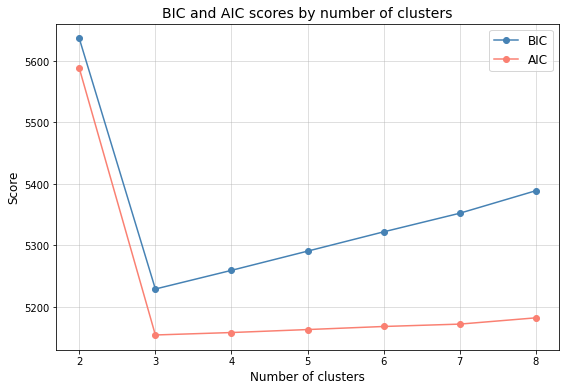

In [43]:
#range of number of clusters/components
n_comps_range = range(2,9)

# empty lists to store the BIC and AIC 
bic_score = []
aic_score = []

# Loop through the range and fit  model
for n_comps in n_comps_range:
    gm = GaussianMixture(n_components = n_comps, 
                         random_state = 0, 
                         n_init = 10,)
    gm.fit(X)
    
    #Append  BIC and AIC to lists
    bic_score.append(gm.bic(X))
    aic_score.append(gm.aic(X))

fig = plt.figure(figsize=(9, 6))
ax = plt.subplot()
ax.plot(n_comps_range, bic_score, marker = 'o', c = "steelblue", label = "BIC")
ax.plot(n_comps_range, aic_score, marker = 'o', c = "salmon", label = "AIC")
ax.set_xlabel('Number of clusters', fontsize = 12)
ax.set_ylabel('Score', fontsize = 12)
ax.set_xticks(n_comps_range)
ax.set_title('BIC and AIC scores by number of clusters', fontsize = 14)
ax.grid(alpha = 0.5)
ax.legend(fontsize = 12);

BIC favors simple models, usually AIC and BIC should be similar. They are meant to be minimized, so pick a low spot (e.g. 3 clusters). AIC tends to fit data better.

## Part 2: implement k-means with numpy

- number of centroids optional
- intialize the centroids randomly (within the range of the data)
- number of steps optional 
- keep track of distance (distance to closest centroid should descrease)

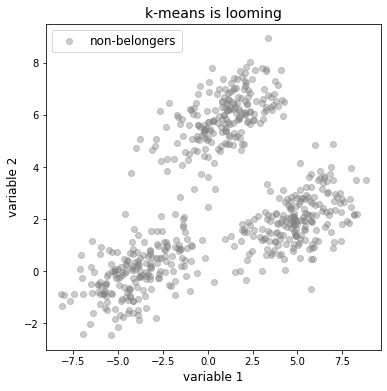

In [45]:
k = 3

cm = ["steelblue", "salmon", "grey", "firebrick", "violet", "goldenrod"]

plt.figure(figsize = (6, 6))
plt.scatter(X[:, 0], X[:, 1], alpha = 0.4, color = "grey", label = "non-belongers")
plt.title("k-means is looming", fontsize = 14)
plt.xlabel("variable 1", fontsize = 12)
plt.ylabel("variable 2", fontsize = 12)
plt.legend(fontsize = 12);

### Functions and initial assignment

In [133]:
def get_centroids(X, k, assigned):
    """computes the coordinates of the centroids"""
    
    centroids = [(X[assigned == i][:, 0].mean(), X[assigned == i][:, 1].mean()) for i in range(1, k + 1)]
    return np.array(centroids)

def assign_cluster(point, centroids):
    """Returns the number of the closest cluster centroid"""
    
    distances = np.sqrt(np.sum((centroids - point)**2, axis = 1))
    return distances.argmin() + 1

def get_distances(point, centroids):
    """Returns the distance to the closest cluster centroid"""
    
    distances = np.sqrt(np.sum((centroids - point)**2, axis = 1))
    return distances.min()

# inital values
np.random.seed(1)
assigned = np.random.randint(1, k + 1, len(X))
centroids = get_centroids(X, k, assigned)

mean_distance = np.mean([get_distances(point, centroids) for point in X])
mean_distances = [mean_distance]
j = 0 # iteration index

### Compute centroids and make assignments

Run this cell repeatedly to see the clusters changing

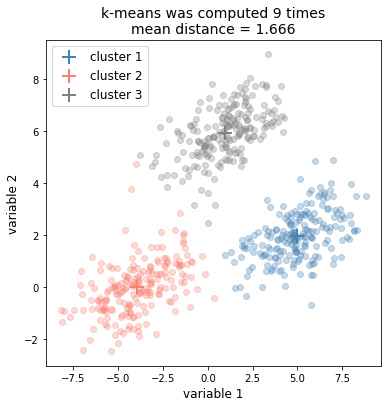

In [143]:
plt.figure(figsize = (6, 6))

for i in range(1, k + 1):
    plt.scatter(X[assigned == i][:, 0], X[assigned == i][:, 1], alpha = 0.3, color = cm[i-1])
    plt.scatter(centroids[i - 1, 0], centroids[i - 1, 1], marker ="+", s = 180, color = cm[i-1], linewidths = 2, label = f"cluster {i}")

plt.legend(fontsize = 12)
plt.title(f"k-means was computed {j} times\nmean distance = {mean_distance:,.3f}", fontsize = 14)
plt.xlabel("variable 1", fontsize = 12)
plt.ylabel("variable 2", fontsize = 12)

# assign again
assigned = np.array([assign_cluster(point, centroids) for point in X])
centroids = get_centroids(X, k, assigned)
mean_distance = np.mean([get_distances(point, centroids) for point in X])
mean_distances.append(mean_distance)

# increment
j += 1

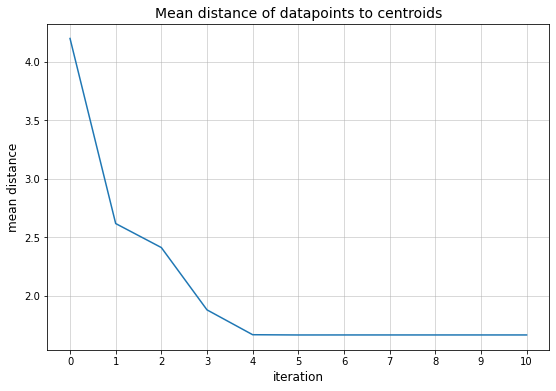

In [144]:
plt.figure(figsize = (9, 6))

plt.plot(np.arange(0, len(mean_distances)), mean_distances)

plt.xlabel("iteration", fontsize = 12)
plt.ylabel("mean distance", fontsize = 12)
plt.xticks(np.arange(0, len(mean_distances)))
plt.title(f"Mean distance of datapoints to centroids", fontsize = 14)
plt.grid(alpha = 0.6)

In [145]:
import pandas as pd
df = pd.DataFrame(mean_distances, columns = ["Mean distance"])
df.index.name = "Iteration"
df

,Mean distance
Iteration,
0,4.198053
1,2.617167
2,2.412108
3,1.879861
4,1.667597
5,1.665388
6,1.665612
7,1.665612
8,1.665612
